In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
import ccxt

### Initialise exchange and get data using CCXT

In [2]:
exchange = ccxt.binance({
    'rateLimit': 1200,
    'enableRateLimit': True,
})

symbol = 'ETH/USDT'
timeframe = '1d'  # 1-day candles
since = exchange.parse8601('2022-01-01T00:00:00Z')  # Fetch data since January 1, 2022
limit = 365  # Number of data points to fetch

ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since, limit)

df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')  # Convert timestamps to datetime objects
df.set_index('timestamp', inplace=True)


In [3]:
close_prices = df['close'].values  # Get close prices as numpy array

# Calculate SMA and EMA
df['SMA_20'] = talib.SMA(close_prices, timeperiod=20)
df['EMA_20'] = talib.EMA(close_prices, timeperiod=20)

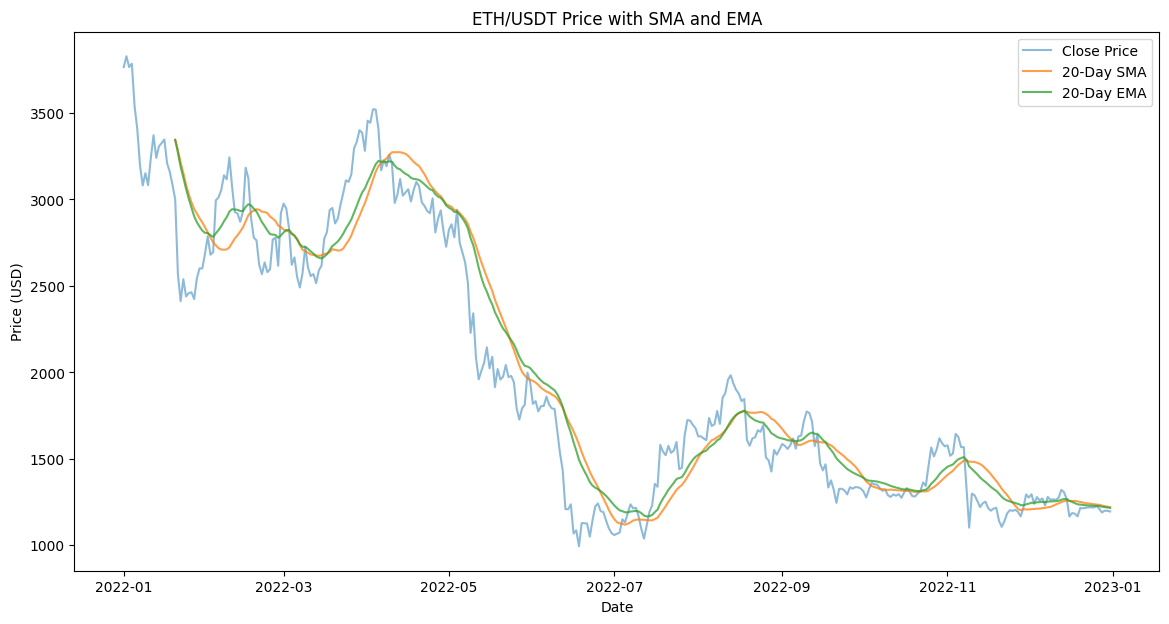

In [4]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['close'], label='Close Price', alpha=0.5)
plt.plot(df.index, df['SMA_20'], label='20-Day SMA', alpha=0.75)
plt.plot(df.index, df['EMA_20'], label='20-Day EMA', alpha=0.75)

plt.title(f'{symbol} Price with SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
